In [ ]:
### If running this on Google Colab, uncomment and run the following lines:

# import os
# !pip install numpy==1.24.2
# !pip install netin
# !wget -nc https://raw.githubusercontent.com/snma-tutorial/www2023/main/exercises/helper.py
# !mkdir plots
# os.kill(os.getpid(), 9)

# Exercise \#1

Generating synthetic networks using the `netin` package

## Dependencies

In [1]:
from netin import *
from netin import viz

/opt/anaconda3/envs/snma/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Helpers

In [2]:
%load_ext autoreload
%autoreload 2

import helper

``` python
# Returns some metadata for each node in a graph as a DataFrame
Graph.get_node_metadata_as_dataframe(self, 
                                     include_graph_metadata=False, 
                                     n_jobs=1) -> pd.DataFrame
```

``` python
# Plots the edge type counts of a single or a list of graphs
helper.plot_edge_type_counts(data: Graph | list[Graph] | set[Graph], **kwargs)
```

``` python
# Updates the name of a graph (by default it is the model name)
helper.update_name_homophily(data: Graph | pd.DataFrame) -> str
```

``` python
# Plots the probability density function
viz.plot_powerlaw_fit(data: pd.DataFrame | list[pd.DataFrame], 
                      col_name: str | list[str], 
                      kind: str,
                      fn=None, 
                      **kwargs)
```

# Undirected graphs

## Comparing the effect of homophily
- Create 3 `PAH` networks
- Make sure all of them have the same number of nodes `n`, minimum degree `k`, fraction of minority `f_m`, and random seed `seed`.
- Make sure they have different values of homophily `h_MM` and `h_mm`
- Plot the edge-type counts
- Plot the probability density function of their degree distributions

### Task 1. Generating graphs

In [3]:
### Fix some parameters to later compare the effects of homophily

n = 1000     # number of nodes
k = 2        # number of edges to attach to every source node
f_m = 0.3    # fraction of minority group
seed = 1234  # random seed (reproducibility)

In [4]:
### Graph #1

h_MM = 0.1  # homophily within majority nodes
h_mm = 0.1  # homophily within minority nodes

g_pah_1 = PAH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_pah_1.generate()
df_pah_1 = g_pah_1.get_node_metadata_as_dataframe(include_graph_metadata=True)

100%|██████████| 8/8 [00:02<00:00,  2.82it/s]


In [5]:
### Graph #2

h_MM = 0.5  # homophily within majority nodes
h_mm = 0.5  # homophily within minority nodes

g_pah_2 = PAH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_pah_2.generate()
df_pah_2 = g_pah_2.get_node_metadata_as_dataframe(include_graph_metadata=True)

100%|██████████| 8/8 [00:02<00:00,  2.83it/s]


In [6]:
### Graph #3

h_MM = 0.9  # homophily within majority nodes
h_mm = 0.9  # homophily within minority nodes

g_pah_3 = PAH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_pah_3.generate()
df_pah_3 = g_pah_3.get_node_metadata_as_dataframe(include_graph_metadata=True)

100%|██████████| 8/8 [00:02<00:00,  2.87it/s]


### Task 2. Getting to know the data

In [7]:
### Checking the attribute "graph" from the PAH object

g_pah_1.graph

{'model': 'PAH',
 'class_attribute': 'm',
 'class_values': [0, 1],
 'class_labels': ['M', 'm'],
 'n': 1000,
 'f_m': 0.3,
 'seed': 1234,
 'h_MM': 0.1,
 'h_mm': 0.1,
 'k': 2}

In [8]:
### Checking the name of the model used to create this graph
### This value never changes, unless you set it manually

g_pah_1.graph['model']

'PAH'

In [9]:
### Checking the name of the graph and node metadata dataframe.
### These attributes are used to show titles in the plots

g_pah_1.get_model_name(), df_pah_1.name

('PAH', 'PAH')

In [10]:
### Checking the type of object

type(g_pah_1)

netin.generators.pah.PAH

In [11]:
### Checking if the PAH object is also a networkx.Graph object

import networkx as nx
isinstance(g_pah_1, nx.Graph)

True

In [12]:
### Checking how to count the type of edges

g_pah_1.calculate_edge_type_counts()

Counter({'MM': 161, 'Mm': 540, 'mM': 1235, 'mm': 60})

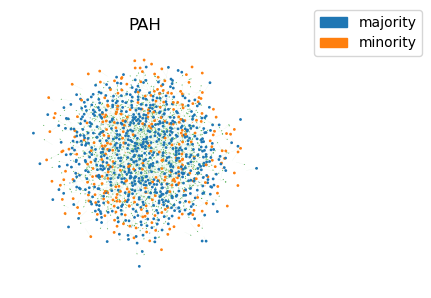

In [13]:
### Plotting a single graph and saving the figure in the plots/ folder

viz.plot_graph(g_pah_1, fn = 'plots/1_graph_1.pdf')

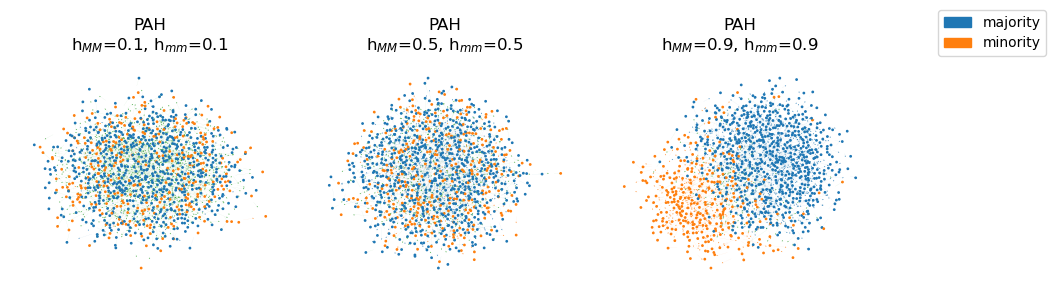

In [14]:
### Updating the name of the graphs to show (besides the model name)
### the homophily values.

g_pah_1.set_model_name(helper.update_name_homophily(g_pah_1))
g_pah_2.set_model_name(helper.update_name_homophily(g_pah_2))
g_pah_3.set_model_name(helper.update_name_homophily(g_pah_3))

### Plotting al graphs at once

data = [g_pah_1, g_pah_2, g_pah_3]
viz.plot_graph(data, fn = 'plots/1_all_graphs.pdf')

### Task 3. Plotting edge-type counts

plots/1_edge_counts.pdf saved.


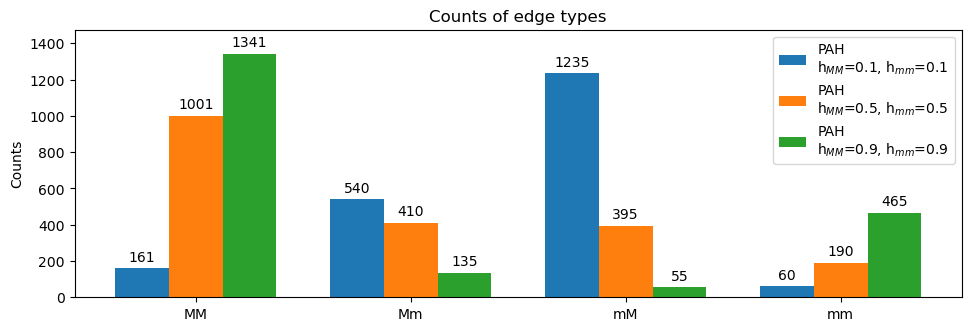

In [15]:
### Plot edge counts for each graph

helper.plot_edge_type_counts(data, fn = 'plots/1_edge_counts.pdf')

### Task 4. Plotting PDFs

In [16]:
### Setting the look & feel

viz.reset_style()
viz.set_paper_style()

In [17]:
### First, rename dataframes (setting it to the new name of the graphs)

df_pah_1.name = g_pah_1.get_model_name()
df_pah_2.name = g_pah_2.get_model_name()
df_pah_3.name = g_pah_3.get_model_name()

In [18]:
### We have now changed the model name in both, the graph and dataframe.
### Let's take a look to these attributes again.
### Notice that the value for the key 'model' in the 'graph' attribute of the PAH object did not change!

g_pah_1.graph['model'], g_pah_1.get_model_name(), df_pah_1.name

('PAH', 'PAH\nh$_{MM}$=0.1, h$_{mm}$=0.1', 'PAH\nh$_{MM}$=0.1, h$_{mm}$=0.1')

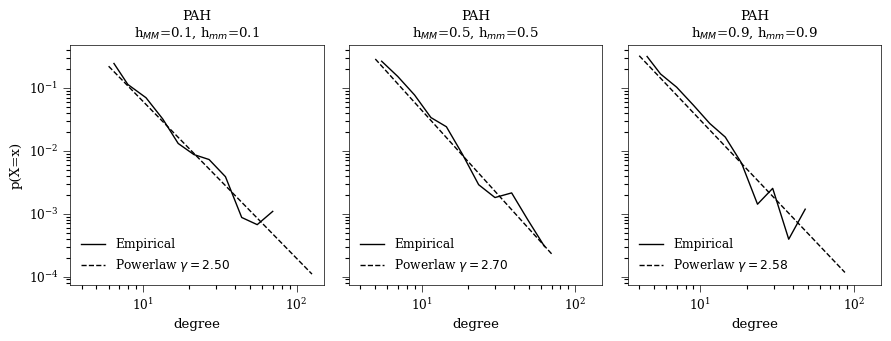

In [19]:
### Plot the probability density function of the degree distribution of the whole graph
### Hint: Check out the dataframe. Which column has the degree of the node?

data = [df_pah_1, df_pah_2, df_pah_3]
x = 'degree'
kind = 'pdf'

viz.plot_powerlaw_fit(data = data, 
                      col_name = x, 
                      kind=kind,
                      sharex = True, 
                      sharey = True,
                      cell_size = (3.,3.5),
                      wspace = 0.1,
                      loc = 3,
                      fn = 'plots/1_pah_degree.pdf')

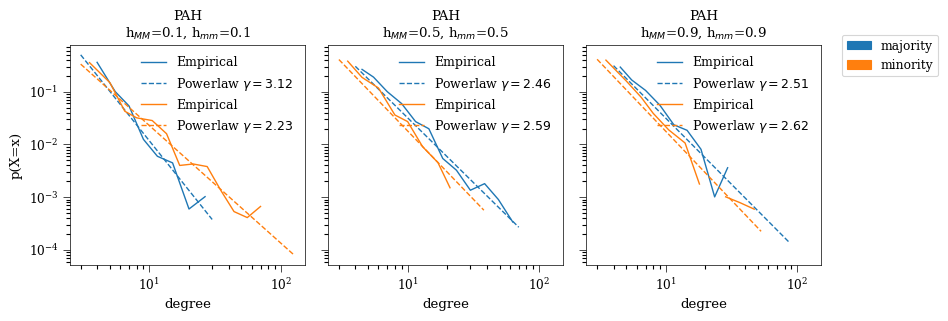

In [20]:
### Plot the probability density function of the degree distribution of each group
### Hint: Check out the dataframe. Which column has the class of the node?
### M for majority, and m for minority.

hue = 'class_label'

viz.plot_powerlaw_fit(data = data, 
                      col_name = x, 
                      kind = kind,
                      hue = hue,
                      sharex = True, 
                      sharey = True,
                      cell_size = (2.8,3.3),
                      wspace = 0.1,
                      loc = 1,
                      fontsize = 9,
                      fn = 'plots/1_pah_degree_groups.pdf')